# Librerías

In [1]:
import numpy as np #para manejar arreglos
from matplotlib import pyplot as plt #para graficar

plt.rcParams["figure.figsize"] = (10,5) #tamaño de los gráficos: ancho x alto

---
# Método de Euler para sistemas de ecuaciones diferenciales

## Charlar la idea mediante un ejemplo

### Comparar contra código para ecuaciones y encontrar las 7 diferencias


In [2]:
def paso_euler_sistemas(z, t, h, f):
    z_sig = z + h*f(t,z) #ojo tanto z como f(t,z) pueden ser un vectores
    return z_sig


def metodo_euler_sistemas(z0, t0, h, f, cant_pasos):
    z = z0
    t = t0

    valores_z = np.array([]) #vector vacío
    valores_z = np.append(valores_z, z0) #agrego elemento al final

    for i in range(cant_pasos):
        z_sig = paso_euler_sistemas(z, t, h, f)
        #el vstack es para que queden en columnas: col 1 es vals de x1, col 2 es vals de x2, etc.
        #o dicho de otra forma como vstack apila verticalmente (por eso vstack) cada fila es la solución (numérica) del sistema a un tiempo
        valores_z = np.vstack( (valores_z, z_sig) )

        t = t + h
        z = z_sig

    return valores_z

# Ejemplo Euler para sistemas

## Sistema predador-presa (+ diagrama de fase)

###Estudiamos el sistema (el PVI mejor dicho):
$$
\begin{cases}
x'&= -0.5x+0.02xy\\
y' &= y-0.02xy\\
x(0)&=4 \\
y(0) &= 20
\end{cases}
$$
###Donde $x$ es la población de predadores, $y$ la de presas.

### Probar con $h=10^{-3}$ y con $h=10^{-1}$ y analizar qué ocurre.

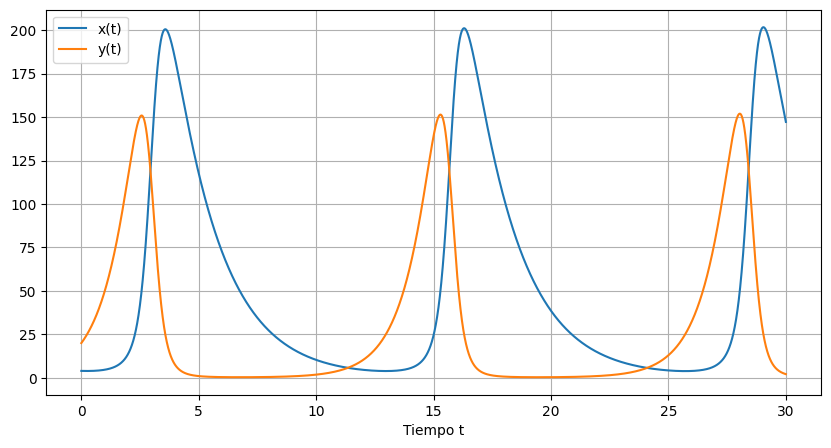

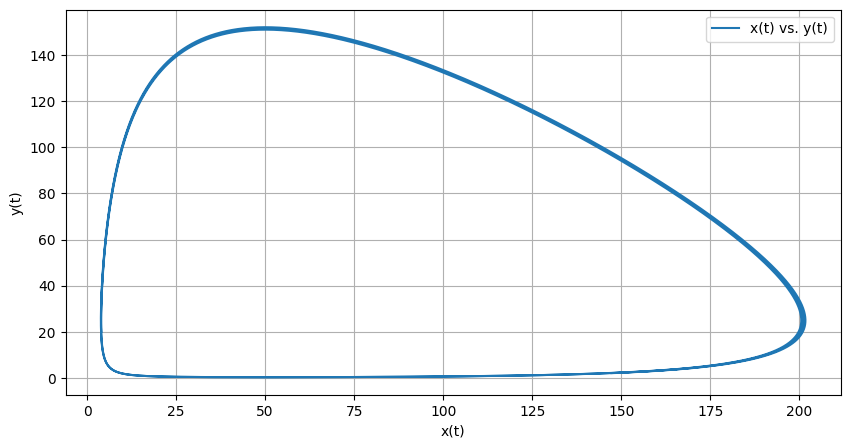

In [3]:
def f(t,z): #ojo z es un vector
    x = z[0]
    y = z[1]
    f1 = -0.5*x+0.02*x*y
    f2 = y - 0.02*x*y
    f = np.array([f1,f2])
    return f


x0 = 4
y0 = 20
z0 = np.array([x0, y0])

t0 = 0
tf = 30 #experimentar

h = 10**(-3)
# poner h = 10**(-1) y ver qué pasa
N = int( (tf-t0)/h )

vals_t = np.linspace(t0, t0+N*h, N+1)
vals_z = metodo_euler_sistemas(z0, t0, h, f, N)


# Grafico x(t)
plt.plot(vals_t, vals_z[:,0], label='x(t)')
plt.xlabel('Tiempo t')
# plt.ylabel('x(t)')
plt.legend()
plt.grid()


# Grafico y(t)
plt.plot(vals_t, vals_z[:,1], label='y(t)')
plt.xlabel('Tiempo t')
# plt.ylabel('y(t)')
plt.legend()
plt.show()


# grafico diagrama de fases
plt.plot(vals_z[:,0], vals_z[:,1], label='x(t) vs. y(t)')
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.legend()
plt.grid()

---
# Runge-Kutta orden 4 para sistemas de ecuaciones diferenciales

### Comparar contra código de Euler explícito y encontrar las 7 diferencias

In [4]:
def paso_rk4_sistemas(z, t, h, f):
    k1 = f(t,z)
    k2 = f(t + 0.5*h, z + 0.5*h*k1)
    k3 = f(t + 0.5*h, z + 0.5*h*k2)
    k4 = f(t + h, z + h*k3)
    z_sig = z + (h/6)*(k1+2*k2+2*k3+k4)
    return z_sig


def metodo_rk4_sistemas(z0, t0, h, f, cant_pasos):
    z = z0
    t = t0

    valores_z = np.array([]) #vector vacío
    valores_z = np.append(valores_z, z0) #agrego elemento al final

    for i in range(cant_pasos):
        z_sig = paso_rk4_sistemas(z, t, h, f)
        #el vstack es para que queden en columnas: col 1 es vals de x, col 2 es vals de y
        valores_z = np.vstack( (valores_z, z_sig) )

        t = t + h
        z = z_sig

    return valores_z

# Ejemplo Runge-Kutta orden 4 para sistemas

## Sistema predador-presa (+ diagramas de fase)

###Estudiamos el sistema (el PVI mejor dicho):
$$
\begin{cases}
x'&= -0.5x+0.02xy\\
y' &= y-0.02xy\\
x(0)&=4 \\
y(0) &= 20
\end{cases}
$$
###Donde $x$ es la población de predadores, $y$ la de presas. $x(0) = 4$, $y(0)=20$.

### Probar con $h=10^{-1}$ y **comparar contra lo ocurrido con Euler**.

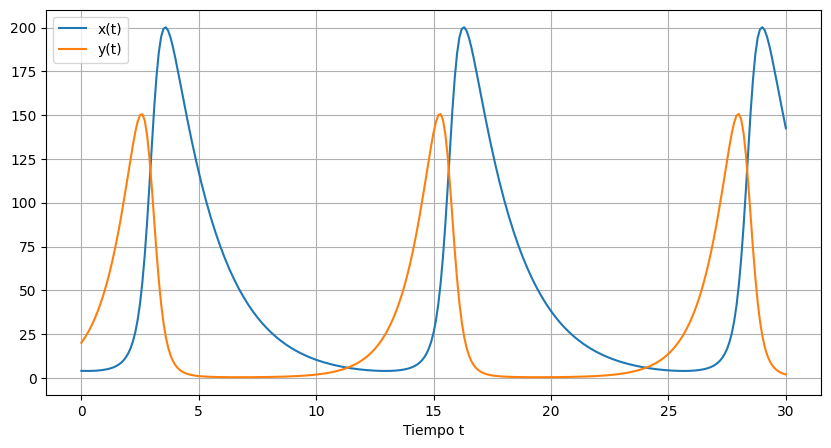

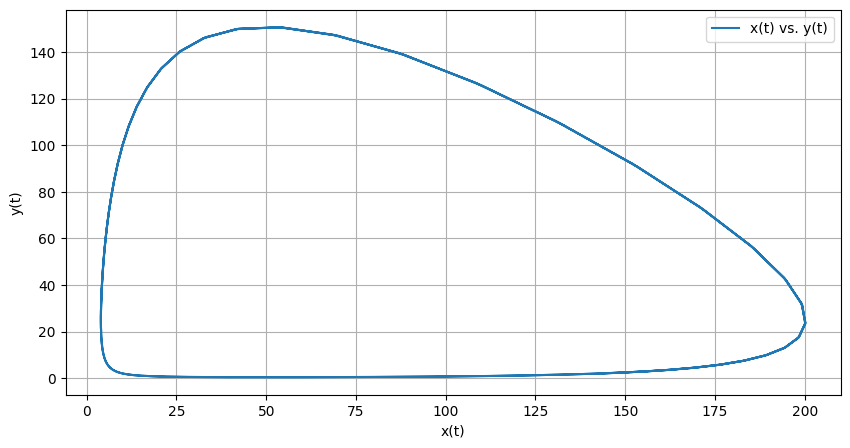

In [5]:
def f(t,z): #ojo z es un vector
    x = z[0]
    y = z[1]
    f1 = -0.5*x+0.02*x*y
    f2 = y - 0.02*x*y
    f = np.array([f1,f2])
    return f


x0 = 4
y0 = 20
z0 = np.array([x0, y0])

t0 = 0
tf = 30 #experimentar

h = 10**(-1)
N = int( (tf-t0)/h )

vals_t = np.linspace(t0, t0+N*h, N+1)
vals_z = metodo_rk4_sistemas(z0, t0, h, f, N)


# Grafico x(t)
plt.plot(vals_t, vals_z[:,0], label='x(t)')
plt.xlabel('Tiempo t')
# plt.ylabel('x(t)')
plt.legend()
plt.grid()


# Grafico y(t)
plt.plot(vals_t, vals_z[:,1], label='y(t)')
plt.xlabel('Tiempo t')
# plt.ylabel('y(t)')
plt.legend()
plt.show()


# grafico diagrama de fases
plt.plot(vals_z[:,0], vals_z[:,1], label='x(t) vs. y(t)')
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.legend()
plt.grid()
plt.show()

# Ejercicios de la guía